In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.shape

(1460, 81)

In [4]:
#Entendo um pouco mais sobre o dataset em si
dataset.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [5]:
null = dataset.isnull().sum()
null[null > 0].sort_values(ascending=True)

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Tratando o nuos que realmente sao erros

In [6]:
#Tratatando todos os outros nulls que sao apenas resposta negativa ao resultado
cols = [
    "BsmtQual",
    "BsmtCond",
    "BsmtFinType1",
    "BsmtExposure",
    "BsmtFinType2",
    "GarageCond",
    "GarageQual",
    "GarageFinish",
    "GarageYrBlt",
    "GarageType",
    "LotFrontage",
    "FireplaceQu",
    "MasVnrType",
    "Fence",
    "Alley",
    "MiscFeature",
    "PoolQC",
    'Electrical'
]

for col in cols:
    print(f"\n{col}")
    print(dataset[col].unique())


BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']

BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']

BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]

BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

GarageFinish
['RFn' 'Unf' 'Fin' nan]

GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

GarageType
['Attchd' 'Detchd' 'BuiltIn' 

In [7]:
#As que sao categoricas de qualidade/tipo setá preenchida com none, pois neste caso o null também é informaçao
none_col = [
    "BsmtQual","BsmtCond","BsmtFinType1","BsmtExposure","BsmtFinType2",
    "GarageCond","GarageQual","GarageFinish","GarageType",
    "FireplaceQu","MasVnrType","Fence","Alley","MiscFeature","PoolQC"
]

dataset[none_col] = dataset[none_col].fillna("None")

#Aqui sao as numericas, que receberao 0
dataset[["GarageYrBlt", "MasVnrArea"]] = dataset[["GarageYrBlt", "MasVnrArea"]].fillna(0)

#Preenchendo a do terreno com a mediana
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())
#Eletrical com a moda
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])


In [8]:
null = dataset.isnull().sum()
null.sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

Analise exploratoria visual após os tratamentos dos dados

In [9]:
dataset.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,69.86,10516.83,6.10,5.58,1971.27,1984.87,103.12,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,22.03,9981.26,1.38,1.11,30.20,20.65,180.73,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,60.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,79.00,11601.50,7.00,6.00,2000.00,2004.00,164.25,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


Text(0.5, 0, 'Dólar')

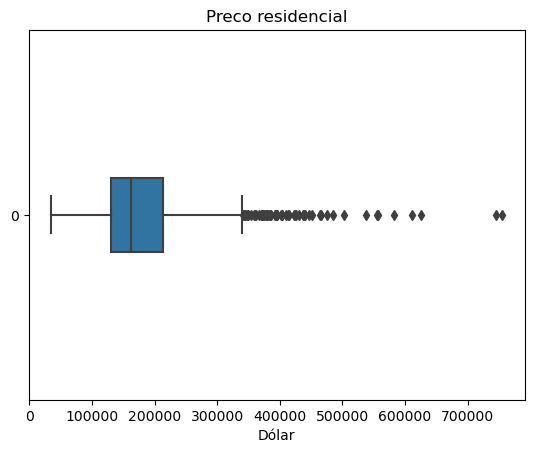

In [10]:
ax = sns.boxplot(data = dataset['SalePrice'], orient = 'h', width = 0.2)
ax.set_title('Preco residencial')
ax.set_xlabel('Dólar')

Através do boxplot podemos checar que existem muitos valores tratados como outliears, mas acredito ser apenas casas de altissmo padrao, e nao outliears reais.

Posso também visualizar que a distribuicao da classe é assimetrica a direita. E a maioria dos valores se concentram entre 120 ~ 200k

c:\Users\henri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


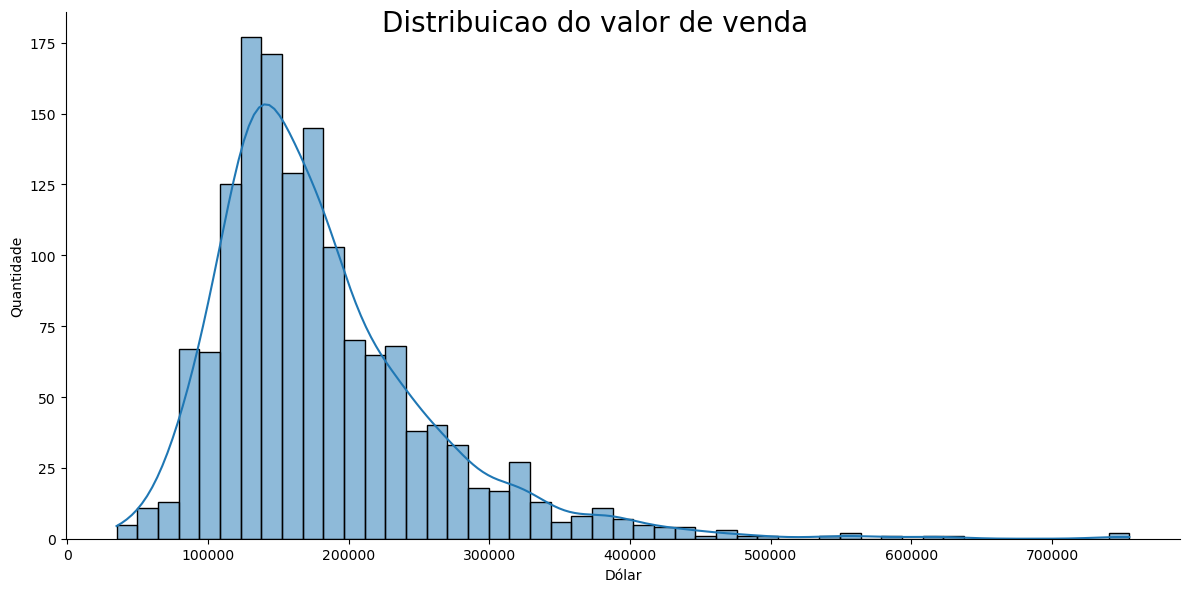

In [11]:
#Checando a ditribuicao da variavel y
ax = sns.displot(data = dataset['SalePrice'], height=6, aspect=2, kde=True)
ax.fig.suptitle('Distribuicao do valor de venda', fontsize=20)
ax.set_axis_labels('Dólar', 'Quantidade')


Como Y é assimetrico, vou utilizar log para tentar puxar para uma normal e extrair melhores resultados em casos de casas de maior valor

In [12]:
y = dataset['SalePrice']
x = dataset.drop(columns=['SalePrice'])

y = np.log1p(y)

c:\Users\henri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


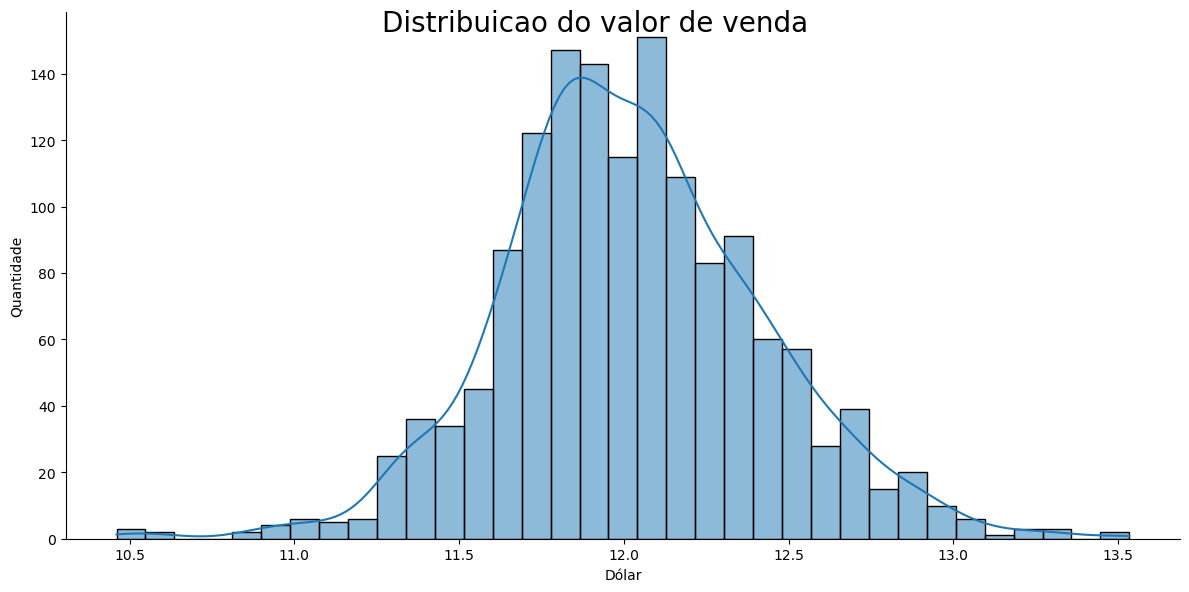

In [13]:
#Checando a distribuicao novamente

ax = sns.displot(data = y, height=6, aspect=2, kde=True)
ax.fig.suptitle('Distribuicao do valor de venda', fontsize=20)
ax.set_axis_labels('Dólar', 'Quantidade')

Agora que a distribuicao se aproxima de uma normal vou seguir com o encoder das variaveis categoricas e criacao / treinamento do modelo

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

cat_cols = x.select_dtypes(include=['object', 'category']).columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

modelo = Pipeline([
    ('prep', preprocess),
    ('regressao', Lasso(alpha= 0.001))
])

modelo.fit(x_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressao', Lasso(alpha=0.001))])

In [ ]:
feature_names = modelo.named_steps['prep'].get_feature_names_out() #Pegando o nome das colunas utiizadas no modelo apos o columtransformer

coef = pd.Series(
    modelo.named_steps['regressao'].coef_,
    index=feature_names
) #Pegando o coef do modelo

In [21]:
(coef == 0).sum() #Quantidade de colunas que sairam do modelo durante o treinamento utilizando o Lasso

205

In [22]:
#Quantidade restante no modelo
(coef >0).sum()

58

In [23]:
coef.sort_values(ascending=False).head(10) #E aqui as que mais impactaram no valor de Y

num__GrLivArea               0.138935
cat__Neighborhood_Crawfor    0.096645
num__OverallQual             0.072772
num__YearBuilt               0.065551
cat__SaleType_New            0.063348
cat__Functional_Typ          0.053154
num__OverallCond             0.049041
cat__Exterior1st_BrkFace     0.042438
num__TotalBsmtSF             0.042033
cat__Condition1_Norm         0.032051
dtype: float64

Decidi utilizar o Lasso ai inves do LinearRegression pois ele lida melhor quando existem muitas variaveis independentes, como existiam originalmente 80 colunas e durante o tratamento que utilizamos o OneHotEncoder para tratar as categoricas e com isso o numero de colunas aumentou muito.

E o Lasso consegue entender o que melhora e o que atrapalha o modelo, fazendo assim com que o modelo conste apenas 58 colunas totais, o que me poupa o trabalho de checar a correlacao da independentes com Y e também poupa o esforço de buscar multicolinearidade entre as independentes que também atrapalha o modelo

# Avaliando o modelo

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_previsto = modelo.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_previsto))
mae = mean_absolute_error(y_test, y_previsto)
r2 = r2_score(y_test, y_previsto)

rmse, mae, r2

(0.23463972174328532, 0.0985452427125601, 0.6638218572806309)

O modelo Lasso apresentou R² de 0.66, explicando aproximadamente 66% da variabilidade dos preços.

O erro médio absoluto corresponde a ~10% do valor do imóvel, indicando boa capacidade preditiva.

O RMSE superior ao MAE sugere a presença de alguns outliers, o que é esperado em dados imobiliários.

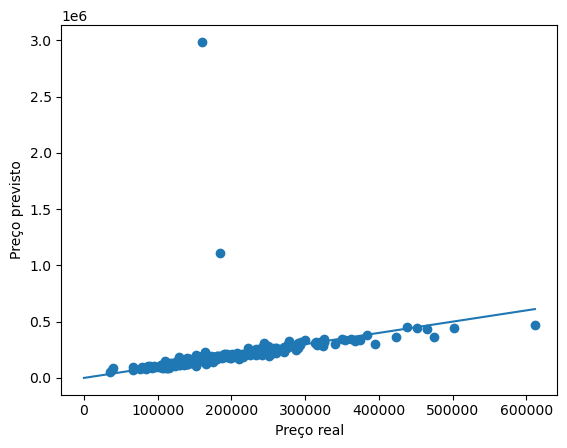

In [ ]:
y_pred = modelo.predict(x_test)

plt.scatter(np.expm1(y_test), np.expm1(y_pred))
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.plot([0, max(np.expm1(y_test))],
         [0, max(np.expm1(y_test))])
plt.show()

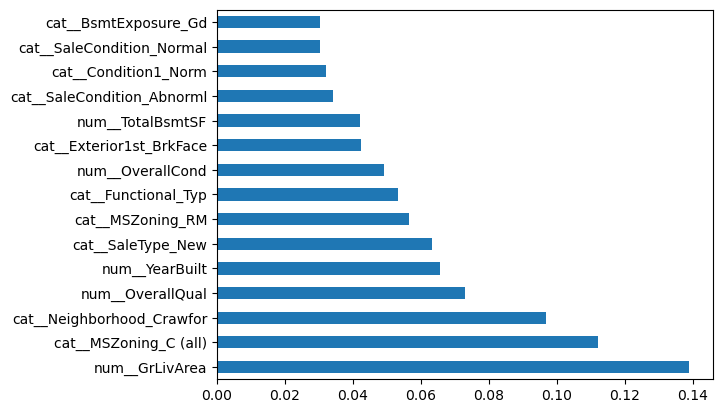

In [36]:
#Importancia de cada variavel independente
coefs = modelo.named_steps['regressao'].coef_

imp = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)

imp.head(15).plot(kind='barh')
plt.show()

In [27]:
y_pred_real = np.expm1(y_previsto)
y_test_real = np.expm1(y_test)

rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae_real = mean_absolute_error(y_test_real, y_pred_real)

rmse_real, mae_real
#Esses aso os valores real fora da escala de log

(175365.02486598553, 27193.894958809167)

In [28]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

-0.0034288912790179094

Como baseline, foi utilizado um DummyRegressor que prevê a média dos preços, obtendo R² ≈ 0.
O modelo Lasso apresentou R² = 0.66, demonstrando ganho significativo de performance e evidenciando aprendizado real a partir das features.

# Salvando o modelo

In [33]:
import pickle

output = open('modelo_previsao_residencial', 'wb')
pickle.dump(modelo, output)
output.close()

# Conclusao

Foi desenvolvido um modelo de regressão para previsão de preços de imóveis utilizando pipeline de preprocessamento com normalização de variáveis numéricas e codificação one-hot para categóricas.

O modelo Lasso apresentou desempenho superior ao baseline, alcançando R² de 0.66 no conjunto de teste e erro médio aproximado de 10% no preço dos imóveis.

A utilização de regularização permitiu reduzir o overfitting e selecionar automaticamente as variáveis mais relevantes.

O modelo final foi salvo para possível uso em produção.